<font size="5">**Notebook di introduzione generale al package *pandas* di Python**</font><br>

> (c) 2025 Antonio Piemontese

Il package *pandas* di Python serve a gestire i **dataframe**.

In [1]:
import pandas as pd     # importazione in memoria del package pandas (già installato di default in Google Colab);
                        # non confondere la installazione di un package con la import: la prima installa SU DISCO e si fa una volta sola (alcuni package 
                        # sono già pre-installati); la seconda carica il package IN MEMORIA e dunque va fatta ad ogni nuova esecuzione del notebook

In [2]:
df = pd.read_csv(filepath_or_buffer='Credit_ISLR.csv', sep=",")   # questa riga dà errore --> occorre fare l'upload del file csv nella session storage

Il file ***Credit*** è un famoso file bancario che contiene 400 clienti di carte di credito descritti lungo una decina di attributi. E' un file simulato negli anni '90 ed è molto usato per imparare python e pandas.

In [3]:
df.head()               # le prime 5 righe

,Unnamed: 0,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [4]:
df.tail()               # le ultime 5 righe

,Unnamed: 0,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
395,396,396,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
396,397,397,13.364,3838,296,5,65,17,Male,No,No,African American,480
397,398,398,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
398,399,399,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0
399,400,400,18.701,5524,415,5,64,7,Female,No,No,Asian,966


**Rimuoviamo** le colonne inutili:

In [5]:
df.drop(columns=['Unnamed: 0','ID'],inplace=True)  # in-place = True rende l'operazione di drop PERSISTENTE (in memoria)

In [6]:
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


La **classe** di un oggetto

In [7]:
type(df)              # la classe dell'oggetto --> è un dataframe perchè è stato creato con la funzione 'pd.read_csv' di pandas

pandas.core.frame.DataFrame

**Cosa è un dataframe?**<br>
E' una TABELLA di righe e colonne **in memoria**. Non è la classica tabella SQL (su disco)

Ora un pò di **analisi** di questo dataset:

In [8]:
df.info()          # fornisce una serie di informazioni sul dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-null    int64  
 6   Gender     400 non-null    object 
 7   Student    400 non-null    object 
 8   Married    400 non-null    object 
 9   Ethnicity  400 non-null    object 
 10  Balance    400 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 34.5+ KB


`float64` è un numero a virgola  mobile in doppia precisione (cioè con i decimali e allocato su 64 bit).<br>
`int64` è un numero intero allocato su 64 bit<br>
`object` è una stringa alfanumerica


Possiamo ottenere alcune di queste info separatamente, con comandi differenti:

In [9]:
display(df.columns.tolist())
display(df.dtypes)
print('\n','numero di NA: ',df.isna().sum().sum().item(),'\n')
print('byte del size: ', df.size)

['Income',
 'Limit',
 'Rating',
 'Cards',
 'Age',
 'Education',
 'Gender',
 'Student',
 'Married',
 'Ethnicity',
 'Balance']

Income       float64
Limit          int64
Rating         int64
Cards          int64
Age            int64
Education      int64
Gender        object
Student       object
Married       object
Ethnicity     object
Balance        int64
dtype: object


 numero di NA:  0 

byte del size:  4400


In [10]:
df.describe()   # calcola le statistiche di base

,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


In [11]:
round(df.describe(),2)

,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.00,400.00,400.00,400.00,400.00,400.00,400.00
mean,45.22,4735.60,354.94,2.96,55.67,13.45,520.02
std,35.24,2308.20,154.72,1.37,17.25,3.13,459.76
min,10.35,855.00,93.00,1.00,23.00,5.00,0.00
25%,21.01,3088.00,247.25,2.00,41.75,11.00,68.75
50%,33.12,4622.50,344.00,3.00,56.00,14.00,459.50
75%,57.47,5872.75,437.25,4.00,70.00,16.00,863.00
max,186.63,13913.00,982.00,9.00,98.00,20.00,1999.00


In [12]:
df['Income'].median()    # mediana molto più bassa della media; come mai? indaghiamo...

33.1155

<Axes: >

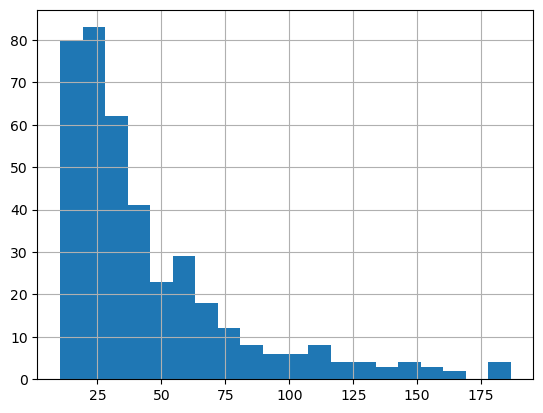

In [13]:
df['Income'].hist(bins=20)

In [14]:
print(df.shape)
print(df['Income'].shape)
print(type(df['Income']))

print(df[['Income']].shape)
print(type(df[['Income']]))

(400, 11)
(400,)
<class 'pandas.core.series.Series'>
(400, 1)
<class 'pandas.core.frame.DataFrame'>


<Axes: >

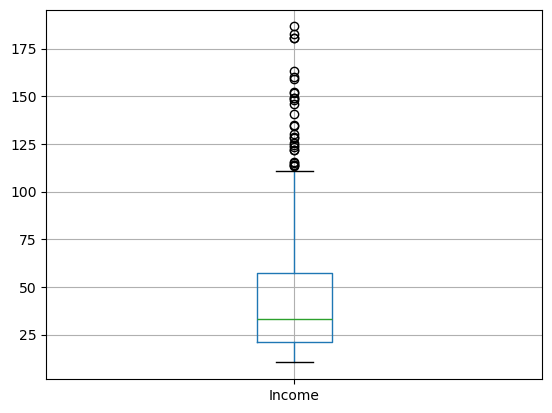

In [15]:
df[['Income']].boxplot()

Calcoliamo la fondamentale matrice di correlazione

In [16]:
df.corr()    # --> dà errore perchè le correlazioni sono calcolabili solo tra coppie di variabili numeriche

ValueError: could not convert string to float: ' Male'

In [ ]:
df.select_dtypes('number')

In [ ]:
round(df.select_dtypes('number').corr(),2)

**Rename** dei nomi colonna

In [17]:
df.rename(columns={'Balance': 'Balance_card'}, inplace=True)
df

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance_card
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
396,13.364,3838,296,5,65,17,Male,No,No,African American,480
397,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
398,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0


**Campionamento casuale**:

In [18]:
df.sample(n=10, random_state=100)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance_card
248,15.717,905,93,1,38,16,Male,Yes,Yes,Caucasian,0
318,18.951,1485,129,3,82,13,Female,No,No,Caucasian,0
173,14.887,4745,339,3,58,12,Male,No,Yes,African American,724
285,18.967,1626,156,2,41,11,Female,No,Yes,Asian,0
184,158.889,11589,805,1,62,17,Female,No,Yes,Caucasian,1448
235,10.503,2923,232,3,25,18,Female,No,Yes,African American,191
124,29.564,2529,192,1,30,12,Female,No,Yes,Caucasian,0
282,63.534,8100,581,2,50,17,Female,No,Yes,Caucasian,1298
151,35.864,4831,353,3,66,13,Female,No,Yes,Caucasian,534
169,27.330,6179,459,4,36,12,Female,No,Yes,Caucasian,1099


***Shuffling*** = rimescolamento (NON per serie temporali)

In [19]:
n = df.shape[0]    # il numero di righe del dataframe
df = df.sample(n,random_state=1000)   # il trucco è qua, il campionamento è fatto su TUTTE le righe, e quindi costituisce uno shuffling
display(df)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance_card
220,44.847,5765,437,3,53,13,Female,Yes,No,Asian,1246
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
230,33.214,5137,387,3,59,9,Male,No,No,African American,661
55,32.916,1786,154,2,60,8,Female,No,Yes,Asian,0
312,27.825,5227,386,6,63,11,Male,No,Yes,Caucasian,823
...,...,...,...,...,...,...,...,...,...,...,...
350,30.002,1561,155,4,70,13,Female,No,Yes,Caucasian,0
251,28.474,3202,267,5,66,12,Male,No,Yes,Caucasian,132
192,28.508,3933,287,4,56,14,Male,No,Yes,Asian,336
71,58.781,7402,538,2,81,12,Female,No,Yes,Asian,1103


Tabelle di contingenza (**frequenze**)

In [20]:
df['Gender'].value_counts
df['Gender'].value_counts()

Gender
Female    207
 Male     193
Name: count, dtype: int64

In [21]:
pd.crosstab(index=df['Gender'],columns=df['Married']) 

Married,No,Yes
Gender,,
Male,76,117
Female,79,128


In [22]:
df['Education'].unique()

array([13, 16,  9,  8, 11, 15, 18, 10, 17, 14, 12, 19,  6,  7, 20,  5])

Gli **indici**:

In [23]:
df.index

Index([220,   4, 230,  55, 312, 122, 281, 371, 365,  32,
       ...
        45, 345, 128, 257, 348, 350, 251, 192,  71,  87],
      dtype='int64', length=400)

In [24]:
df.set_index('Education',inplace=True) 
df

,Income,Limit,Rating,Cards,Age,Gender,Student,Married,Ethnicity,Balance_card
Education,,,,,,,,,,
13,44.847,5765,437,3,53,Female,Yes,No,Asian,1246
16,55.882,4897,357,2,68,Male,No,Yes,Caucasian,331
9,33.214,5137,387,3,59,Male,No,No,African American,661
8,32.916,1786,154,2,60,Female,No,Yes,Asian,0
11,27.825,5227,386,6,63,Male,No,Yes,Caucasian,823
...,...,...,...,...,...,...,...,...,...,...
13,30.002,1561,155,4,70,Female,No,Yes,Caucasian,0
12,28.474,3202,267,5,66,Male,No,Yes,Caucasian,132
14,28.508,3933,287,4,56,Male,No,Yes,Asian,336


In [25]:
df.reset_index(inplace=True) 

Il metodo `style`:

In [26]:
df.select_dtypes('number').head().style.map(lambda v: 'color: red' if v < 150 else '')

,Education,Income,Limit,Rating,Cards,Age,Balance_card
0,13,44.847000,5765,437,3,53,1246
1,16,55.882000,4897,357,2,68,331
2,9,33.214000,5137,387,3,59,661
3,8,32.916000,1786,154,2,60,0
4,11,27.825000,5227,386,6,63,823


In [27]:
display(df.select_dtypes('number').head().style.bar(subset=['Income'], color='lightblue'))
df.select_dtypes('number').style.bar(subset=['Income', 'Balance_card'], color='#d65f5f')

,Education,Income,Limit,Rating,Cards,Age,Balance_card
0,13,44.847000,5765,437,3,53,1246
1,16,55.882000,4897,357,2,68,331
2,9,33.214000,5137,387,3,59,661
3,8,32.916000,1786,154,2,60,0
4,11,27.825000,5227,386,6,63,823


,Education,Income,Limit,Rating,Cards,Age,Balance_card
0,13,44.847000,5765,437,3,53,1246
1,16,55.882000,4897,357,2,68,331
2,9,33.214000,5137,387,3,59,661
3,8,32.916000,1786,154,2,60,0
4,11,27.825000,5227,386,6,63,823
5,11,62.602000,7056,481,1,84,904
6,13,36.142000,1852,183,3,33,0
7,15,39.116000,2150,173,4,75,0
8,15,113.772000,6442,489,4,69,790
9,13,134.181000,7838,563,2,48,526


In [28]:
df.head().style.background_gradient(cmap='coolwarm')

,Education,Income,Limit,Rating,Cards,Age,Gender,Student,Married,Ethnicity,Balance_card
0,13,44.847000,5765,437,3,53,Female,Yes,No,Asian,1246
1,16,55.882000,4897,357,2,68,Male,No,Yes,Caucasian,331
2,9,33.214000,5137,387,3,59,Male,No,No,African American,661
3,8,32.916000,1786,154,2,60,Female,No,Yes,Asian,0
4,11,27.825000,5227,386,6,63,Male,No,Yes,Caucasian,823


In [29]:
df.select_dtypes('number').style.highlight_max(axis=0,color='red')

,Education,Income,Limit,Rating,Cards,Age,Balance_card
0,13,44.847000,5765,437,3,53,1246
1,16,55.882000,4897,357,2,68,331
2,9,33.214000,5137,387,3,59,661
3,8,32.916000,1786,154,2,60,0
4,11,27.825000,5227,386,6,63,823
5,11,62.602000,7056,481,1,84,904
6,13,36.142000,1852,183,3,33,0
7,15,39.116000,2150,173,4,75,0
8,15,113.772000,6442,489,4,69,790
9,13,134.181000,7838,563,2,48,526


Con il metodo `style` possiamo ora **visualizzare meglio la matrice di correlazione**:

In [31]:
df.select_dtypes('number').corr().style.background_gradient(cmap='coolwarm')

,Education,Income,Limit,Rating,Cards,Age,Balance_card
Education,1.000000,-0.027692,-0.023549,-0.030136,-0.051084,0.003619,-0.008062
Income,-0.027692,1.000000,0.792088,0.791378,-0.018273,0.175338,0.463656
Limit,-0.023549,0.792088,1.000000,0.996880,0.010231,0.100888,0.861697
Rating,-0.030136,0.791378,0.996880,1.000000,0.053239,0.103165,0.863625
Cards,-0.051084,-0.018273,0.010231,0.053239,1.000000,0.042948,0.086456
Age,0.003619,0.175338,0.100888,0.103165,0.042948,1.000000,0.001835
Balance_card,-0.008062,0.463656,0.861697,0.863625,0.086456,0.001835,1.000000


Il subsetting di riga:

In [32]:
df[1:2]

,Education,Income,Limit,Rating,Cards,Age,Gender,Student,Married,Ethnicity,Balance_card
1,16,55.882,4897,357,2,68,Male,No,Yes,Caucasian,331


**Trasformazione** di una variabile categorica (da numerica a fattore):

In [33]:
df['Gender'] = df['Gender'].astype('category')
df.dtypes

Education          int64
Income           float64
Limit              int64
Rating             int64
Cards              int64
Age                int64
Gender          category
Student           object
Married           object
Ethnicity         object
Balance_card       int64
dtype: object

In [45]:
df.select_dtypes(['category'])

,Gender
0,Female
1,Male
2,Male
3,Female
4,Male
...,...
395,Female
396,Male
397,Male
398,Female


**Ordinamenti**:

In [34]:
df.sort_values(by = 'Income', ascending = False,inplace=False) # senza 'inplace=True', altrimenti diventa permanente;

,Education,Income,Limit,Rating,Cards,Age,Gender,Student,Married,Ethnicity,Balance_card
235,14,186.634,13414,949,2,41,Female,No,Yes,African American,1809
288,17,182.728,13913,982,4,98,Male,No,Yes,Caucasian,1999
209,8,180.682,11966,832,2,58,Female,No,Yes,African American,1405
155,8,180.379,9310,665,3,67,Female,Yes,Yes,Asian,1050
205,14,163.329,8732,636,3,50,Male,No,Yes,Caucasian,529
...,...,...,...,...,...,...,...,...,...,...,...
311,13,10.588,4049,296,1,66,Female,No,Yes,Caucasian,465
29,18,10.503,2923,232,3,25,Female,No,Yes,African American,191
296,7,10.403,4159,310,3,43,Male,No,Yes,Asian,571
11,18,10.363,2430,191,2,47,Female,No,Yes,Asian,0


**Raggruppamenti**:

In [35]:
df.select_dtypes('number').groupby(by='Age').mean()

,Education,Income,Limit,Rating,Cards,Balance_card
Age,,,,,,
23,7.000000,24.3140,3409.000000,270.000000,2.000000,194.000000
24,11.666667,34.7740,3561.666667,275.000000,2.333333,377.333333
25,14.857143,21.1970,4166.428571,317.428571,3.142857,577.142857
26,16.000000,16.4790,5435.000000,388.000000,2.000000,937.000000
27,17.500000,32.3915,3532.500000,268.500000,2.000000,146.000000
...,...,...,...,...,...,...
86,16.000000,88.8300,4952.000000,360.000000,4.000000,15.000000
87,8.000000,89.6245,8749.000000,620.000000,2.500000,1234.500000
89,17.000000,123.2990,8376.000000,610.000000,2.000000,1259.000000


La **standardizzazione**:

In [36]:
import numpy as np
from sklearn import preprocessing         # il modulo che contiene MOLTE funzioni di pre-elaborazione


np.set_printoptions(suppress=False)       # sopprime l'uso della notazione scientifica per piccoli numeri: # imposta la precisione dell'output della mantissa (se tutte le cifre decimali danno fastidio)
df_std = preprocessing.scale(df.select_dtypes('number'))          # la standardizzazione si può fare solo su colonne numeriche
print(type(df_std))
print(df_std.shape)
df_std

<class 'numpy.ndarray'>
(400, 7)


array([[-0.1441708 , -0.01056486,  0.44653396, ...,  0.03103187,
        -0.15483308,  1.5810335 ],
       [ 0.81696786,  0.30292777,  0.07001222, ..., -0.6991298 ,
         0.71583089, -0.41163254],
       [-1.42568902, -0.34104603,  0.17411961, ...,  0.03103187,
         0.19343251,  0.3070339 ],
       ...,
       [ 0.17620875, -0.47473849, -0.34815247, ...,  0.76119355,
         0.01929972, -0.40074365],
       [-0.46455035,  0.38528528,  1.15663313, ..., -0.6991298 ,
         1.47040633,  1.26961137],
       [-0.46455035, -0.95107114, -1.06909617, ...,  0.76119355,
         0.19343251, -1.13247675]])

Le **serie**

In [37]:
s = pd.Series([10,2,23,4])
s

0    10
1     2
2    23
3     4
dtype: int64

In [38]:
type(s)

pandas.core.series.Series

In [39]:
s.shape

(4,)

In [40]:
s.index

RangeIndex(start=0, stop=4, step=1)

Le colonne di un dataframe sono 'serie'. In altri termini, un dataframe pandas è la somma di tante colonne:

In [41]:
type(df['Income'])

pandas.core.series.Series

dataframe e serie hanno molti metodi differenti (alcuni in comuni)

In [42]:
display(s.shape)
display(df.shape)

(4,)

(400, 11)

In [43]:
s.boxplot  # ce l'ha solo il dataframe

AttributeError: 'Series' object has no attribute 'boxplot'